In [1]:
import numpy as np

In [2]:
n_balls = 7

In [3]:
from numpy.random import default_rng

#rng = default_rng()
numbers =np.arange(1, 90 + 1)

In [4]:
#balls = np.random.choice(np.arange(1, n_balls + 1), size = n_balls, replace = False)# (n_balls,100))
balls = np.random.choice(numbers, size = n_balls, replace = False)# (n_balls,100))

In [5]:
balls

array([11, 65, 64,  8, 61, 79, 47])

In [6]:
from math import comb

In [8]:
comb(5 - 2,3 - 2)/comb(5,2)

0.3

In [9]:
from matplotlib import pyplot as plt

In [10]:
from itertools import combinations

Probabilidad de que al sacar k bolas de n bolas posibles, 
el conjunto de k bolas contenga las d bolas que yo ya tengo.

Tesis:

p = comb(n - d,k - d)/comb(n,k)

In [11]:
n = 90
k = 15
d = 15
probs = {}
for k in range(k, n+1):
    probs[k] = comb(n - d,k - d)/comb(n,k)
    
    

xpected number of calls before a player wins, according to the number of players. The more players the faster the game.  This means that for 10 players it takes 25 calls to get a house. This falls to 18 calls for 50 players, 15 calls for 100 players, 13 for 200 players, 11 for 500 players and 10 for 1,000 players. 

In [12]:
probs[50]

4.9149392950668864e-05

In [13]:
exp = 0
for n, p in probs.items():
    exp += n*p
exp/sum(probs.values())

85.58823529411765

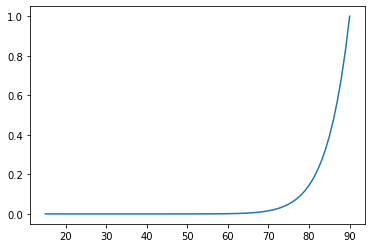

In [18]:
plt.plot(probs.keys(), probs.values())

Cual es la distribución de probabilidad de que alguien gane en la tirada x?

In [15]:
a = [1,2,3]

In [16]:
s = a+a+a+a+a+a+a+a+a+a+a

In [ ]:
a.pop(

In [74]:
b = a.copy()

In [20]:
comb(n,k)

15504

In [21]:
comb_generator = combinations(range(1,n+1),k)

In [26]:
my_set = set(range(1, d + 1))
outcomes = list(combinations(range(1,n+1),k))

In [27]:
count = 0
for o in outcomes:
    if not (my_set - set(o)):
        count+=1
p = count/len(outcomes)
p

0.5526315789473685

In [75]:
# Starting code

import numpy as np

def mutual_information(arr):
    return 1.

In [76]:
100/3

33.333333333333336

In [19]:
arr = np.random.randint(0, 20, size = (10,5))

In [20]:
arr

array([[ 3,  8,  5, 13, 11],
       [ 9, 15,  6,  8, 18],
       [ 8,  5, 19, 12, 10],
       [12, 14,  0, 11, 15],
       [15,  7, 12,  5, 16],
       [15, 12, 17, 12, 11],
       [19, 11,  1, 10, 12],
       [13,  9,  8, 10, 14],
       [11, 17, 19,  3, 17],
       [ 9,  7, 13,  0,  5]])

In [21]:
arr.sum(axis = 0)

array([114, 105, 100,  84, 129])

In [88]:
def mutual_information(arr):
    return (arr*np.log(arr + 1)).sum() \
    - (arr.sum(axis = 0) * np.log(arr.sum(axis = 0) + 1)).sum() \
    - (arr.sum(axis = 1) * np.log(arr.sum(axis = 1) + 1 )).sum()

In [89]:
mutual_information(arr)

-2539.2410457693613

In [2]:
import yfinance as yf

In [4]:
df = yf.download("AAPL")

[*********************100%***********************]  1 of 1 completed


In [6]:
df.to_csv("appl.csv")

In [8]:
import pandas as pd

In [34]:
file = "./appl.csv"

In [35]:
df = pd.read_csv(file, index_col = "Date")
df.index = pd.to_datetime(df.index)
df["year"] = df.index.year

In [56]:
df

,Open,High,Low,Close,Adj Close,Volume,year
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600,1980
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800,1980
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000,1980
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600,1980
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600,1980
...,...,...,...,...,...,...,...
2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400,2022
2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000,2022
2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700,2022


In [57]:
#df.groupby("year").transform("max")

In [58]:
max_values = df.groupby("year").max().reset_index()[["Volume", "year"]]

merge = pd.merge(df.reset_index(), max_values, on = ["Volume", "year"])

In [64]:
max_close = df.groupby("year").max().reset_index()[["Close", "year"]]
merge = pd.merge(df.reset_index(), max_close, on = ["Close", "year"])

In [61]:
merge[["Date", "Volume"]].sort_values("Date")

,Date,Volume
0,1980-12-12,469033600
1,1981-03-13,231302400
2,1982-08-25,357078400
3,1983-09-23,2832345600
4,1984-08-06,626796800
5,1985-03-07,733980800
6,1986-03-20,904131200
7,1987-04-02,777280000
8,1988-01-20,680960000
9,1989-01-27,2127171200


In [24]:
type(df_compare.index[0])

pandas._libs.tslibs.timestamps.Timestamp

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17',
               '2022-03-18', '2022-03-21', '2022-03-22', '2022-03-23',
               '2022-03-24', '2022-03-25'],
              dtype='datetime64[ns]', name='Date', length=10410, freq=None)

In [ ]:
import numpy as np
import pandas as pd


def solution(files):
    # files - any of available files, i.e:
    # files = ["./data/framp.csv", "./data/gnyned.csv", "./data/gwoomed.csv",
    #            "./data/hoilled.csv", "./data/plent.csv", "./data/throwsh.csv",
    #            "./data/twerche.csv", "./data/veeme.csv"]

    # write your solution here
    output = []
    for f in files:
        df1, df2 = process_file(f)
        output.append([df1,df2])
    return output

def process_file(f):
    df = pd.read_csv(f, index_col = "date")
    df.index = pd.to_datetime(df.index)
    df["year"] = df.index.year

    max_values = df.groupby("year").max().reset_index()
    max_vol = max_values[["vol", "year"]]
    max_close = max_values[["close", "year"]]
    
    pd.merge(df.reset_index(), max_values[["vol", "year"]], on = ["vol", "year"])

    compute_df = lambda col : pd.merge(df.reset_index(), max_values[[col "year"]], on = [col, "year"])

    return compute_df("vol"), compute_df2("close")

def compute_df(column):
    
    max_vol = df.groupby("year").max().reset_index()[["vol", "year"]]
    merge = pd.merge(df.reset_index(), max_vol, on = ["vol", "year"])
    return merge[["date", "vol"]].sort_values("date")

def compute_df2(df):
    max_close = df.groupby("year").max().reset_index()[["close", "year"]]
    merge = pd.merge(df.reset_index(), max_close, on = ["close", "year"])
    return merge[["date", "close"]].sort_values("date")






In [ ]:
FUNCIONA

In [66]:
import numpy as np
import pandas as pd


def solution(files):
    # files - any of available files, i.e:
    # files = ["./data/framp.csv", "./data/gnyned.csv", "./data/gwoomed.csv",
    #            "./data/hoilled.csv", "./data/plent.csv", "./data/throwsh.csv",
    #            "./data/twerche.csv", "./data/veeme.csv"]

    # write your solution here
    output = []
    for f in files:
        df1, df2 = process_file(f)
        output.append([df1,df2])
    return output

def process_file(f):
    df = pd.read_csv(f, index_col = "date")
    df.index = pd.to_datetime(df.index)
    df["year"] = df.index.year

    return compute_df1(df), compute_df2(df)

def compute_df1(df):
    max_vol = df.groupby("year").max().reset_index()[["vol", "year"]]
    merge = pd.merge(df.reset_index(), max_vol, on = ["vol", "year"])
    return merge[["date", "vol"]].sort_values("date")

def compute_df2(df):
    max_close = df.groupby("year").max().reset_index()[["close", "year"]]
    merge = pd.merge(df.reset_index(), max_close, on = ["close", "year"])
    return merge[["date", "close"]].sort_values("date")

NameError: name 'FUNCIONA' is not defined

In [74]:
S = """photo.jpg, Warsaw, 2013-09-05 14:08:15
john.png, London, 2015-06-20 15:13:22
myFriends.png, Warsaw, 2013-09-05 14:07:13
Eiffel.jpg, Paris, 2015-07-23 08:03:02
pisatower.jpg, Paris, 2015-07-22 23:59:59
BOB.jpg, London, 2015-08-05 00:02:03
notredame.png, Paris, 2015-09-01 12:00:00
me.jpg, Warsaw, 2013-09-06 15:40:22
a.png, Warsaw, 2016-02-13 13:33:50
b.jpg, Warsaw, 2016-01-02 15:12:22
c.jpg, Warsaw, 2016-01-02 14:34:30
d.jpg, Warsaw, 2016-01-02 15:15:01
e.png, Warsaw, 2016-01-02 09:49:09
f.png, Warsaw, 2016-01-02 10:55:32
g.jpg, Warsaw, 2016-02-29 22:13:11"""

In [68]:
obj = """
Warsaw02.jpg
London1.png
Warsaw01.png
Paris2.jpg
Paris1.jpg
London2.jpg
Paris3.png
Warsaw03.jpg
Warsaw09.png
Warsaw07.jpg
Warsaw06.jpg
Warsaw08.jpg
Warsaw04.png
Warsaw05.png
Warsaw10.jpg
"""

In [70]:
photo_strings = S.split("\n")

In [78]:
from datetime import datetime

In [83]:
print(timestamp)


2016-02-29 22:13:11


datetime.datetime(2016, 2, 29, 22, 13, 11)

In [144]:
t = "PAris"

In [146]:
t.lower()

'paris'

In [150]:
from collections import defaultdict

camel_case = lambda t : t[0].capitalize() + t[1:].lower()
date_format = "%Y-%m-%d %H:%M:%S"
metadata = {}
photos_by_city = defaultdict(list)
for s in photo_strings:
    name, city, time_str = s.split(", ")
    city = camel_case(city)
    time = datetime.strptime(time_str, date_format)
    ext = name.split(".")[-1]
    metadata[s] = {"full_name" : s, "city" : city,  "extension" : ext, "time" : time}
    photos_by_city[city].append(s)

final_mapping = {}
for city, photos in photos_by_city.items():
    city_metadata = list(map(metadata.get,photos))
    city_metadata_sorted = sorted(city_metadata, key=lambda d: d['time'])
    n_elements = len(city_metadata_sorted)
    for i, meta in enumerate(city_metadata_sorted):
        number_str = str(i + 1).rjust(len(str(n_elements)), "0")
        new_name = f"{meta.get('city')}{number_str}.{meta.get('extension')}"
        final_mapping[meta["full_name"]] = new_name

output = ""
for s in photo_strings:
    output += f"{final_mapping[s]}\n"

In [136]:
output == obj

False

In [133]:
print(output)

Warsaw02.jpg
London1.png
Warsaw01.png
Paris2.jpg
Paris1.jpg
London2.jpg
Paris3.png
Warsaw03.jpg
Warsaw09.png
Warsaw07.jpg
Warsaw06.jpg
Warsaw08.jpg
Warsaw04.png
Warsaw05.png
Warsaw10.jpg



In [120]:
n_elements = len(city_metadata_sorted)
for i in range(1, n_elements + 1):
    output_name = str(i).rjust(len(str(n_elements)), "0")
    print(output_name)

01
02
03
04
05
06
07
08
09
10


In [117]:
output_name

'10'

In [111]:
e = "ddd"

In [113]:
e.rjust(10, "0")

'0000000ddd'

In [110]:
len(city_metadata_sorted)

10

In [106]:
city_metadata_sorted

[{'full_name': 'pisatower.jpg, Paris, 2015-07-22 23:59:59',
  'city': 'Paris',
  'extension': 'jpg',
  'time': datetime.datetime(2015, 7, 22, 23, 59, 59)},
 {'full_name': 'Eiffel.jpg, Paris, 2015-07-23 08:03:02',
  'city': 'Paris',
  'extension': 'jpg',
  'time': datetime.datetime(2015, 7, 23, 8, 3, 2)},
 {'full_name': 'notredame.png, Paris, 2015-09-01 12:00:00',
  'city': 'Paris',
  'extension': 'png',
  'time': datetime.datetime(2015, 9, 1, 12, 0)}]

In [151]:
photos

['Eiffel.jpg, Paris, 2015-07-23 08:03:02',
 'pisatower.jpg, Paris, 2015-07-22 23:59:59',
 'notredame.png, Paris, 2015-09-01 12:00:00']

In [71]:
photos_by_city

['photo.jpg, Warsaw, 2013-09-05 14:08:15',
 'john.png, London, 2015-06-20 15:13:22',
 'myFriends.png, Warsaw, 2013-09-05 14:07:13',
 'Eiffel.jpg, Paris, 2015-07-23 08:03:02',
 'pisatower.jpg, Paris, 2015-07-22 23:59:59',
 'BOB.jpg, London, 2015-08-05 00:02:03',
 'notredame.png, Paris, 2015-09-01 12:00:00',
 'me.jpg, Warsaw, 2013-09-06 15:40:22',
 'a.png, Warsaw, 2016-02-13 13:33:50',
 'b.jpg, Warsaw, 2016-01-02 15:12:22',
 'c.jpg, Warsaw, 2016-01-02 14:34:30',
 'd.jpg, Warsaw, 2016-01-02 15:15:01',
 'e.png, Warsaw, 2016-01-02 09:49:09',
 'f.png, Warsaw, 2016-01-02 10:55:32',
 'g.jpg, Warsaw, 2016-02-29 22:13:11']

In [167]:
tuple([2,2])

(2, 2)

In [168]:
!pwd

/Users/juanluis/Documents/catfit


In [171]:
imp0rt = 1

In [172]:
import imp0rt

ModuleNotFoundError: No module named 'imp0rt'